In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from imblearn.over_sampling import RandomOverSampler
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake["temp"]=1
true["temp"]=0

In [5]:
df = pd.concat([fake, true]).reset_index(drop=True)

In [6]:
print(df.shape)


(44898, 5)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   temp     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
input_arr=np.array(df['title'])

In [9]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yadalaaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
corpus = []
for i in range(len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)


In [11]:
df

,title,text,subject,date,temp
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = df['temp'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [14]:
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred_logistic)


In [16]:
cm = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {round(accuracy * 100, 2)}%")


Confusion Matrix:
 [[4018  249]
 [ 327 4386]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4267
           1       0.95      0.93      0.94      4713

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Accuracy: 93.59%


In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

Accuracy for KNN: 0.6318485523385301


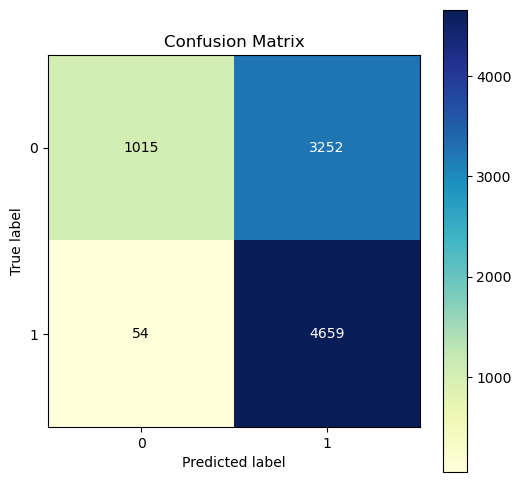

In [18]:
# Plot Confusion Matrix for KNN
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6, 6), cmap='YlGnBu')
print('Accuracy for KNN:', accuracy_score(y_test, y_pred_knn))

In [19]:
# ROC AUC Score for KNN
y_pred_prob_knn = knn_classifier.predict_proba(X_test)[:, 1]
print('ROC AUC Score for KNN:', roc_auc_score(y_test, y_pred_prob_knn))


ROC AUC Score for KNN: 0.9146750450302482
